In [115]:
import cv2

In [116]:
import numpy as np

In [117]:
import matplotlib.pyplot as plt

In [118]:
import random

In [222]:
img = cv2.imread('./jan03-2.png', cv2.IMREAD_COLOR)

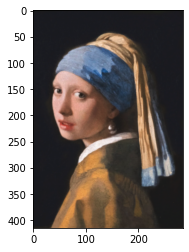

In [223]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [224]:
img.shape

(415, 285, 3)

In [225]:
def glitcher(img_param, glitch_param):
    img = img_param.copy()
    for y,row in enumerate(img):
        for x,px in enumerate(row):
            if np.random.rand()>0.65:
                rx = int((np.random.rand()-0.5)*glitch_param)
                ry = int((np.random.rand()-0.5)*glitch_param)
                ex_x = (x+rx)
                ex_y = y+ry
                if ex_x<0:
                    ex_x = 0
                if ex_y<0:
                    ex_y = 0
                if ex_x>=img.shape[1]:
                    ex_x = img.shape[1]-1
                if ex_y>=img.shape[0]:
                    ex_y = img.shape[0]-1
                curent_px = px
                ex_px = img[ex_y][ex_x]
                img[y][x] = ex_px
                img[ex_y][ex_x] = curent_px
    return img

In [226]:
def glitcher_2(img_param, glitch_param):
    img = img_param.copy()
    for y,row in enumerate(img):
        if np.random.rand()>0.8:
            rx = int((np.random.rand()-0.5)*glitch_param)
            if rx>0:
                p0 = row[0]
                row[rx:] = row[:-rx]
                row[:rx] = p0
            elif rx<0:
                pz = row[-1]
                row[:rx] = row[(-rx):]
                row[rx:] = pz
    return img

In [236]:
def glitcher_3(img_param, glitch_param):
    img = img_param.copy()
    H = 10
    rx = int((np.random.rand()-0.5)*glitch_param)
    for y,row in enumerate(img):
        if y%H==0:
            rx = int((np.random.rand()-0.5)*glitch_param)
            is_glitch = np.random.rand()>0.1
        if is_glitch:
            if rx>0:
                p0 = row[0]
                row[rx:] = row[:-rx]
                row[:rx] = p0
            elif rx<0:
                pz = row[-1]
                row[:rx] = row[(-rx):]
                row[rx:] = pz
    return img

In [40]:
# img = cv2.resize(img,(int(img.shape[1]*0.5),int(img.shape[0]*0.5)))

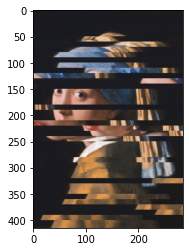

In [228]:
plt.imshow(cv2.cvtColor(glitcher_3(img, 500), cv2.COLOR_BGR2RGB))

In [41]:
# plt.imshow(cv2.cvtColor(res2, cv2.COLOR_GRAY2RGB))

In [208]:
np.sin(35*np.pi/35)

1.2246467991473532e-16

In [252]:
import imageio
images = []
for i in range(50):
    print(i)
    loop_factor = np.sin(i*np.pi/50)-0.1
    if loop_factor<0.1:
        loop_factor=0.1
    images.append(cv2.cvtColor(glitcher_3(img,int(loop_factor*np.random.rand()*img.shape[1]*0.55)), cv2.COLOR_BGR2RGB))
    # images.append(cv2.cvtColor(glitcher_3(img,int(np.sin(i*np.pi/40)*img.shape[1]/2)), cv2.COLOR_BGR2RGB))    
imageio.mimsave('./jan03.gif', images)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
